# Graphs

<img src="px1.png" style="height:900px;">

<img src="2.png" >


<img src="5.png" >


<img src="4.png" >


<img src="3.png" >


In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv("./train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
mean = df.Age.mean()
mean

29.69911764705882

# Fill miss value with mean

In [5]:
df.Age.fillna(mean,inplace=True)

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [8]:
xtrain ,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# Check Data are Normally Distribution or Not

### Check using PDF plot and QQ plot on Age Column

# Check Age data

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


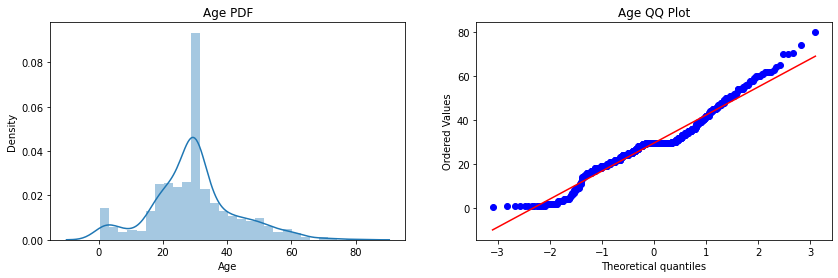

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(xtrain["Age"])
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(xtrain["Age"], dist="norm",plot=plt)
plt.title("Age QQ Plot")
plt.show()

# Age data are Are Distribution

# Check Fare data

### Check using PDF plot and QQ plot on Fare Column

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


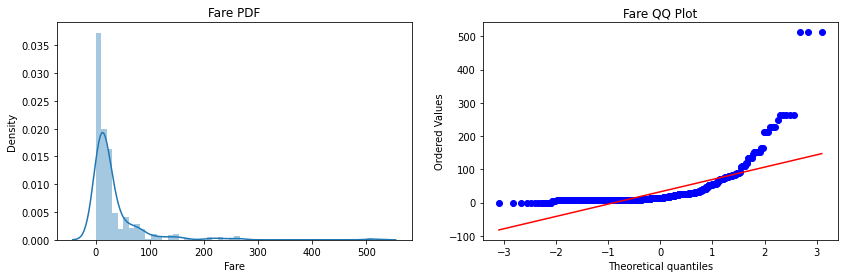

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(xtrain['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(xtrain['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()



# Fare Data are Right-Skewed
## so Apply log Transform
<img src="5.png" >


# Build Model

In [11]:
clf = LogisticRegression()

In [12]:
clf.fit(xtrain,ytrain)

LogisticRegression()

In [13]:
pred = clf.predict(xtest)

In [14]:
print("Accuracy LR",accuracy_score(ytest,pred))

Accuracy LR 0.6480446927374302


# Log Transform

* # log transform are not used on negative value
* # log transform are used on Right-Skewed Data
* # log transform are used linear models


## FunctionTransformer(func=np.log1p)
### recommended to used log1p

# Applying Log Transform on Fare Data

In [15]:
trf = FunctionTransformer(func=np.log1p)
trf

FunctionTransformer(func=<ufunc 'log1p'>)

In [16]:
xtrain_t = trf.fit_transform(xtrain) 
xtest_t = trf.fit_transform(xtest) 

# now again Train

In [17]:
clf_t = LogisticRegression()

In [18]:
clf_t.fit(xtrain_t,ytrain)

LogisticRegression()

In [19]:
pred_t = clf_t.predict(xtest_t)

In [20]:
print("Accuracy LR",accuracy_score(ytest,pred_t))

Accuracy LR 0.6815642458100558


# Cross Validiation

In [21]:
X_TR = trf.fit_transform(x)
clf_cr = LogisticRegression()
print("Acc ",np.mean(cross_val_score(clf_cr,X_TR,y,scoring="accuracy",cv=10)))

Acc  0.678027465667915


# Check Again Distributation

# Fare 

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


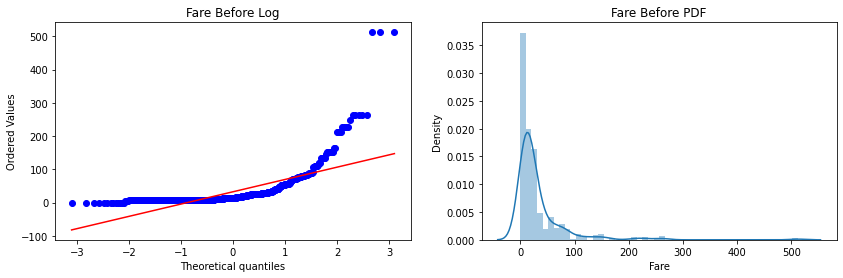

In [37]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(xtrain["Fare"],dist="norm",plot=plt)
plt.title("Fare Before Log")

plt.subplot(122)
sns.distplot(xtrain['Fare'])
plt.title('Fare Before PDF')
plt.show()

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


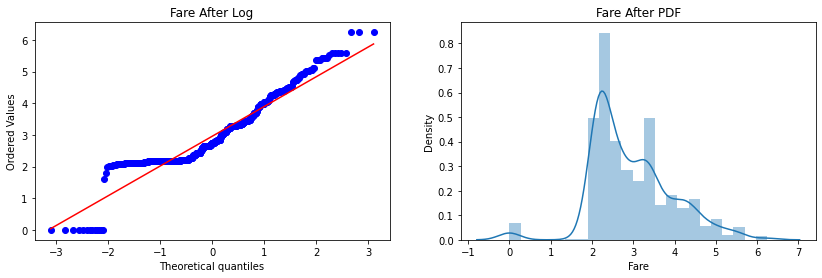

In [23]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(xtrain_t["Fare"],dist="norm",plot=plt)
plt.title("Fare After Log")

plt.subplot(122)
sns.distplot(xtrain_t['Fare'])
plt.title('Fare After PDF')
plt.show()

# What Happened if we apply log Transform on Distrubution data ?

## Age data are already Distrubute

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


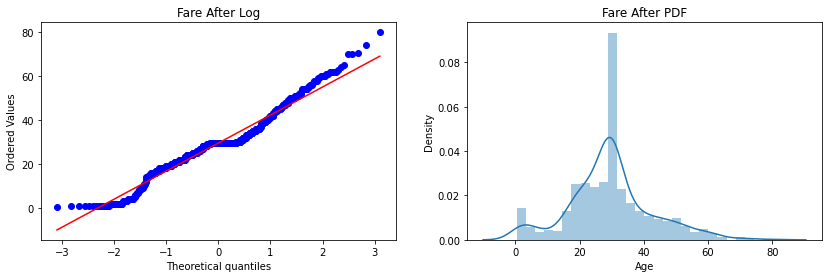

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(xtrain["Age"],dist="norm",plot=plt)
plt.title("Fare After Log")

plt.subplot(122)
sns.distplot(xtrain['Age'])
plt.title('Fare After PDF')
plt.show()

In [25]:
df = pd.read_csv("./train.csv",usecols=["Age","Fare","Survived"])

mean = df.Age.mean()
df.Age.fillna(mean,inplace=True)
x = df.iloc[:,1:3]
y = df.iloc[:,0]

xtrain ,xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
trf = ColumnTransformer(
    [
        ('log',FunctionTransformer(np.log1p),['Age'])
    ]
    
,remainder='passthrough')

In [27]:
X_train_transformed = trf.fit_transform(xtrain)
X_test_transformed = trf.transform(xtest)

# Now Check Age Data Distribution

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


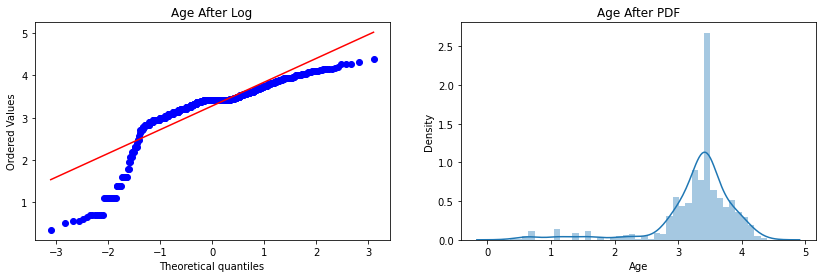

In [28]:
ag = pd.DataFrame(X_train_transformed,columns=["Age","Fare"])

plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(ag["Age"],dist="norm",plot=plt)
plt.title("Age After Log")

plt.subplot(122)
sns.distplot(ag['Age'])
plt.title('Age After PDF')
plt.show()

/home/sweeterror404/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


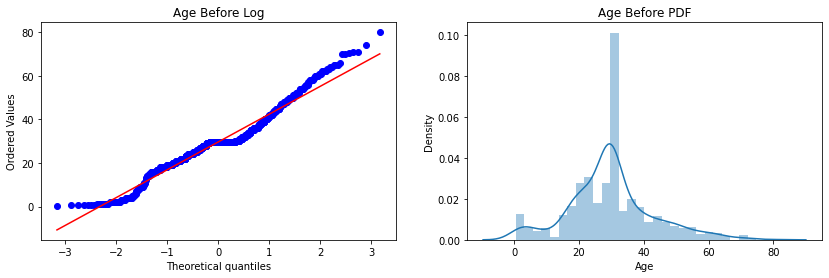

In [29]:
ag = pd.DataFrame(X_train_transformed,columns=["Age","Fare"])

plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(df["Age"],dist="norm",plot=plt)
plt.title("Age Before Log")

plt.subplot(122)
sns.distplot(df['Age'])
plt.title('Age Before PDF')
plt.show()